# **Importing Data**

In [1]:
# getting file directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        src = os.path.join(dirname, filename)

In [2]:
# loading data
from scipy.io import loadmat

mnist = loadmat(src)
X = mnist["data"].T
y = mnist["label"][0]

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
y

array([0., 0., 0., ..., 9., 9., 9.])

# **Data Preprocessing**

## **Reshaping Image Dimensions**

In [5]:
# reshaping the data to (number of samples, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

## **Normalizing Image Pixel Values**

In [6]:
# normalizing the pixel values to range [0, 1]
X = X / 255.0

## **Looking at images**

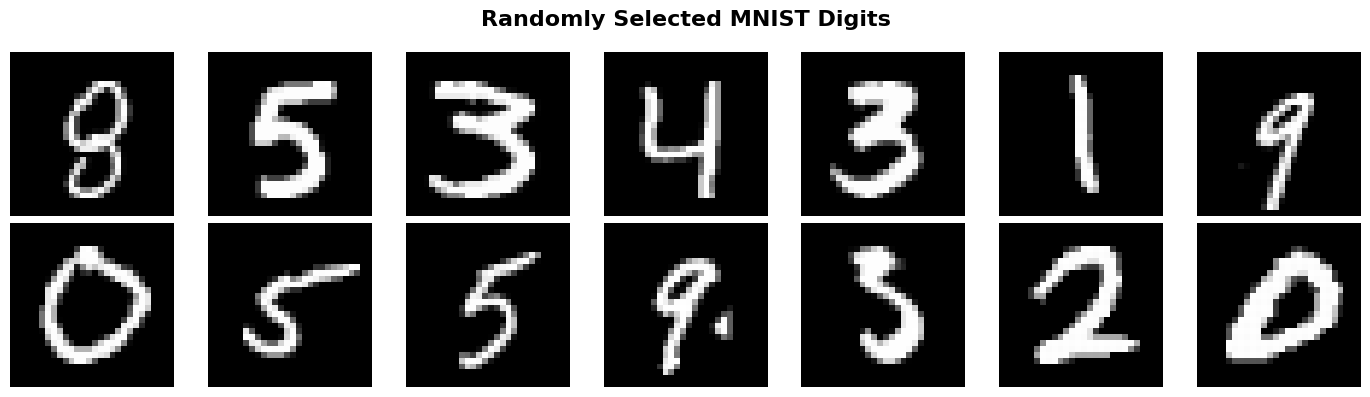

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# generating 10 random indices
random_indices = np.random.choice(X.shape[0], 14, replace=False)

# creating a 2x5 subplot
fig, axes = plt.subplots(2, 7, figsize=(14, 4))

for i, ax in enumerate(axes.flat):
    
    # plotting each digit
    ax.imshow(X[random_indices[i]].reshape(28, 28), cmap='gray')
    ax.axis('off')

# adding a title over the entire plot
fig.suptitle('Randomly Selected MNIST Digits', fontsize=16, fontweight = 'bold')

plt.tight_layout()
plt.show()

## **Splitting Test and Train**

In [8]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# **Model Training**

## **Setting GPU as Default**

In [9]:
# Set device placement logging
tf.debugging.set_log_device_placement(True)

# Check available devices
print("Available devices:")
for device in tf.config.list_physical_devices():
    print(device)

# Ensure GPU is available
if not tf.config.list_physical_devices('GPU'):
    raise RuntimeError('No GPU device found.')

Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## **Training Model**

Epoch 1/50


I0000 00:00:1725134330.300336      66 service.cc:145] XLA service 0x795a98002610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725134330.300396      66 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 38/438 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4035 - loss: 1.7631

I0000 00:00:1725134333.154476      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8343 - loss: 0.5146 - val_accuracy: 0.9830 - val_loss: 0.0539
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9831 - loss: 0.0547 - val_accuracy: 0.9863 - val_loss: 0.0447
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9894 - loss: 0.0338 - val_accuracy: 0.9907 - val_loss: 0.0313
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9905 - val_loss: 0.0292
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9933 - loss: 0.0200 - val_accuracy: 0.9887 - val_loss: 0.0377
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9940 - loss: 0.0174 - val_accuracy: 0.9918 - val_loss: 0.0269
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9890 - val_loss: 0.0415
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9966 - loss: 0.0121 - val_accuracy: 0.9903 - val

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,368,608 (5.22 MB)

 Trainable params: 456,202 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 912,406 (3.48 MB)

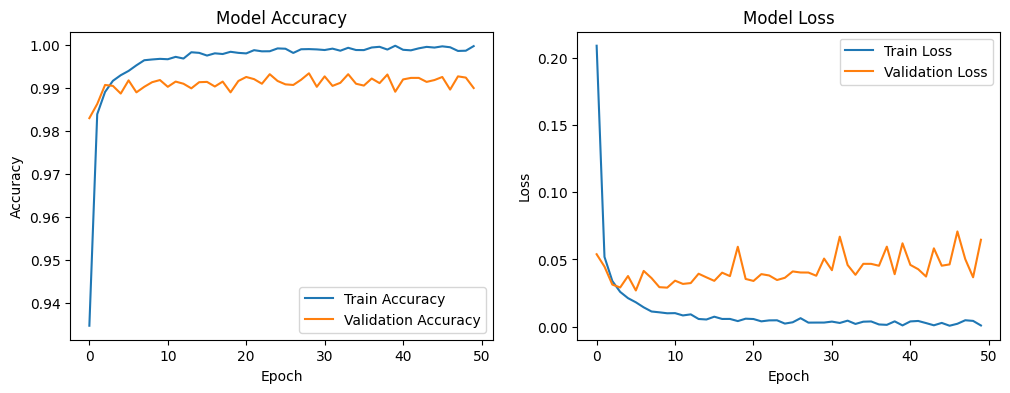

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# converting data to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Define your model here
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),                # Input layer with 28x28x1 dimensions (grayscale)
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),   # First convolutional layer with 32 filters
    layers.MaxPooling2D((2, 2)),                    # First max-pooling layer
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),   # Second convolutional layer with 64 filters
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),   # Third convolutional layer with 128 filters
    layers.MaxPooling2D((2, 2)),                    # Third max-pooling layer
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),   # Fourth convolutional layer with 256 filters
    layers.MaxPooling2D((2, 2)),                    # Fourth max-pooling layer
    layers.Flatten(),                               # Flatten the 2D feature maps to a 1D vector
    layers.Dense(256, activation='relu'),            # Fully connected layer with 256 units
    layers.Dense(10, activation='softmax')          # Output layer with 10 units (one for each digit)
])


# Configure GPU usage
with tf.device('/device:GPU:0'):
    # Compile the model
    opt = optimizers.Adam()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Print a summary of the model
model.summary()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()